In [1]:
from dbfread import DBF
import pandas as pd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [2]:
import geopandas as gpd

In [3]:
dbf = Dbf5('./GO_Addr_v081017_enc/GO_Addr_v081017.dbf')

df = dbf.to_dataframe()

In [4]:
df.head()

,OU_CD,OU_NM,OU_TP_CD,STR_ONE_AD,STR_TWO_AD,STR_THRE_A,CTY_AD,ST_CD,ZIP_CD,XCOORD,YCOORD
0,A02,BIRMINGHAM,GO,2311 HIGHLAND AVENUE SOUTH,SUITE 100,NaN,BIRMINGHAM,AL,352052974,-86.78,33.50
1,A03,KNOXVILLE,GO,265 BROOKVIEW CENTRE WAY,SUITE 102,NaN,KNOXVILLE,TN,37919,-83.99,35.93
2,A04,CENTRAL GEORGIA,GO,6055 LAKESIDE COMMONS DRIVE,SUITE 300,NaN,MACON,GA,31210,-83.71,32.89
3,A05,MONTGOMERY,GO,4121 CARMICHAEL ROAD,SUITE 501,NaN,MONTGOMERY,AL,361063603,-86.23,32.35
4,A07,CHARLOTTE,GO,6100 FAIRVIEW ROAD,SUITE 400,NaN,CHARLOTTE,NC,28210,-80.85,35.12


In [5]:
street_map = gpd.read_file('./GO_Addr_v081017_enc/GO_Addr_v081017.shp')

In [6]:
Sales_map = gpd.read_file('./SLS_Addr_v081017_enc/SLS_Addr_v081017.shp')

In [257]:
street_map.head()

,OU_CD,OU_NM,OU_TP_CD,STR_ONE_AD,STR_TWO_AD,STR_THRE_A,CTY_AD,ST_CD,ZIP_CD,XCOORD,YCOORD,geometry
0,A02,BIRMINGHAM,GO,2311 HIGHLAND AVENUE SOUTH,SUITE 100,None,BIRMINGHAM,AL,352052974,-86.78,33.50,POINT (-86.78000 33.50000)
1,A03,KNOXVILLE,GO,265 BROOKVIEW CENTRE WAY,SUITE 102,None,KNOXVILLE,TN,37919,-83.99,35.93,POINT (-83.99000 35.93000)
2,A04,CENTRAL GEORGIA,GO,6055 LAKESIDE COMMONS DRIVE,SUITE 300,None,MACON,GA,31210,-83.71,32.89,POINT (-83.71000 32.89000)
3,A05,MONTGOMERY,GO,4121 CARMICHAEL ROAD,SUITE 501,None,MONTGOMERY,AL,361063603,-86.23,32.35,POINT (-86.23000 32.35000)
4,A07,CHARLOTTE,GO,6100 FAIRVIEW ROAD,SUITE 400,None,CHARLOTTE,NC,28210,-80.85,35.12,POINT (-80.85000 35.12000)


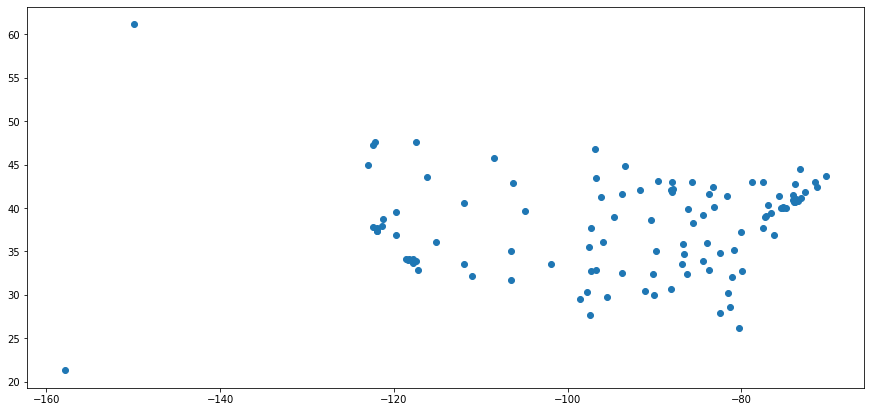

In [66]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [62]:
geometry = [Point(xy) for xy in zip(df['XCOORD'], df['YCOORD'])]
geometry[:3]

In [7]:
census_shape = gpd.read_file('./tl_2018_us_county/tl_2018_us_county.shp')

In [8]:
census_shape.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819484,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169287528,22832516,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [9]:
census_shape['INTPTLAT'] = census_shape['INTPTLAT'].astype(float)
census_shape['INTPTLON'] = census_shape['INTPTLON'].astype(float)

In [139]:
census_shape_mainland = census_shape[(census_shape['INTPTLAT'] > 25) & (census_shape['INTPTLAT'] < 50) 
                                 &(census_shape['INTPTLON'] > -140)& (census_shape['INTPTLON'] < -60) ]


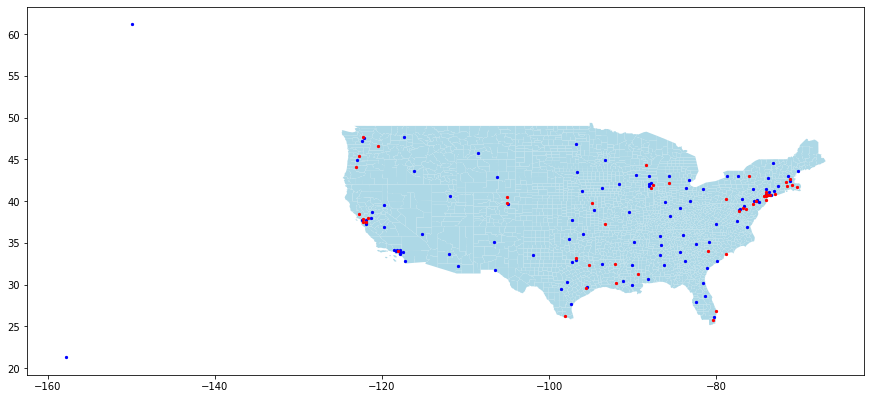

In [74]:
fig,ax = plt.subplots(figsize = (15,15))
census_shape_mainland.plot(ax = ax, color = 'lightblue')
street_map.plot(ax = ax, color = 'blue', markersize = 5)
Sales_map.plot(ax = ax, color = 'red', markersize = 5)
plt.show()

In [85]:
census_shape_mainland.plot(column=census_shape_mainland['LSAD'], cmap='Blues',linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()

<Figure size 432x288 with 0 Axes>

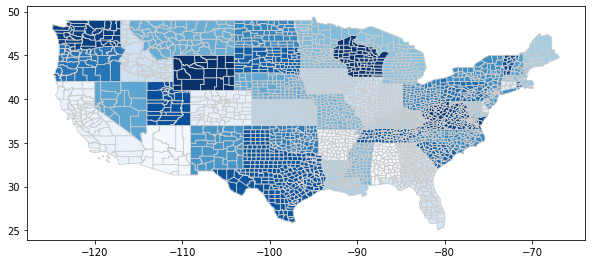

In [87]:
variable = 'STATEFP'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
census_shape_mainland.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#plt.legend

In [10]:
pop = pd.read_csv('PopulationEstimates.csv')

In [11]:
pop.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0.0,US,United States,NaN,NaN,NaN,NaN,NaN,"308,745,538","308,758,105",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,NaN,"4,779,736","4,780,138",...,0.4,1.2,0.5,1.2,1.6,0.6,0.6,0.8,1.1,1.9
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,"54,571","54,574",...,1.1,0.7,6.0,-6.1,-3.9,2.0,-1.9,5.3,1.0,0.6
3,1003.0,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,"182,265","182,264",...,22.0,24.3,16.3,17.6,22.9,20.2,17.9,21.5,22.5,24.8
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,"27,457","27,457",...,-25.5,-9.1,0.3,-6.8,-8.1,-5.1,-15.5,-18.2,-25.0,-8.6


In [12]:
pop_2018 = pop[['FIPS','State','Area_Name', 'POP_ESTIMATE_2018']]

In [13]:
pop_2018.head()

,FIPS,State,Area_Name,POP_ESTIMATE_2018
0,0.0,US,United States,"327,167,434"
1,1000.0,AL,Alabama,"4,887,871"
2,1001.0,AL,Autauga County,"55,601"
3,1003.0,AL,Baldwin County,"218,022"
4,1005.0,AL,Barbour County,"24,881"


In [14]:
pop_2018['FIPS'] = pop_2018['FIPS'].astype(float)

/Users/ruoyuzhu/anaconda3/envs/1011nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
#STATEFP COUNTYFP
census_shape_mainland['FIPS'] = census_shape_mainland[['STATEFP','COUNTYFP']].apply(lambda x: '{}{}'.format(x[0],x[1]),axis = 1)
census_shape_mainland['FIPS'] = census_shape_mainland['FIPS'].astype(float)

/Users/ruoyuzhu/anaconda3/envs/1011nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
census_shape_mainland.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,41.915865,-96.788517,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039.0
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956809,61588406,46.294638,-123.424458,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069.0
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819484,29089486,34.359273,-104.368696,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011.0
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169287528,22832516,40.783547,-96.688658,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",31109.0
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,40.176492,-98.046842,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129.0


In [160]:
merged = census_shape_mainland.merge(pop_2018, how = 'left', on = 'FIPS')

In [161]:
len(merged)

3107

In [162]:
merged.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,State,Area_Name,POP_ESTIMATE_2018
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,A,1477652222,10690952,41.915865,-96.788517,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039.0,NE,Cuming County,"8,940"
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,A,680956809,61588406,46.294638,-123.424458,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069.0,WA,Wahkiakum County,"4,426"
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,...,A,6016819484,29089486,34.359273,-104.368696,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011.0,NM,De Baca County,"1,781"
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,A,2169287528,22832516,40.783547,-96.688658,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",31109.0,NE,Lancaster County,"317,272"
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,A,1489645187,1718484,40.176492,-98.046842,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129.0,NE,Nuckolls County,"4,195"


NameError: name 'merged' is not defined

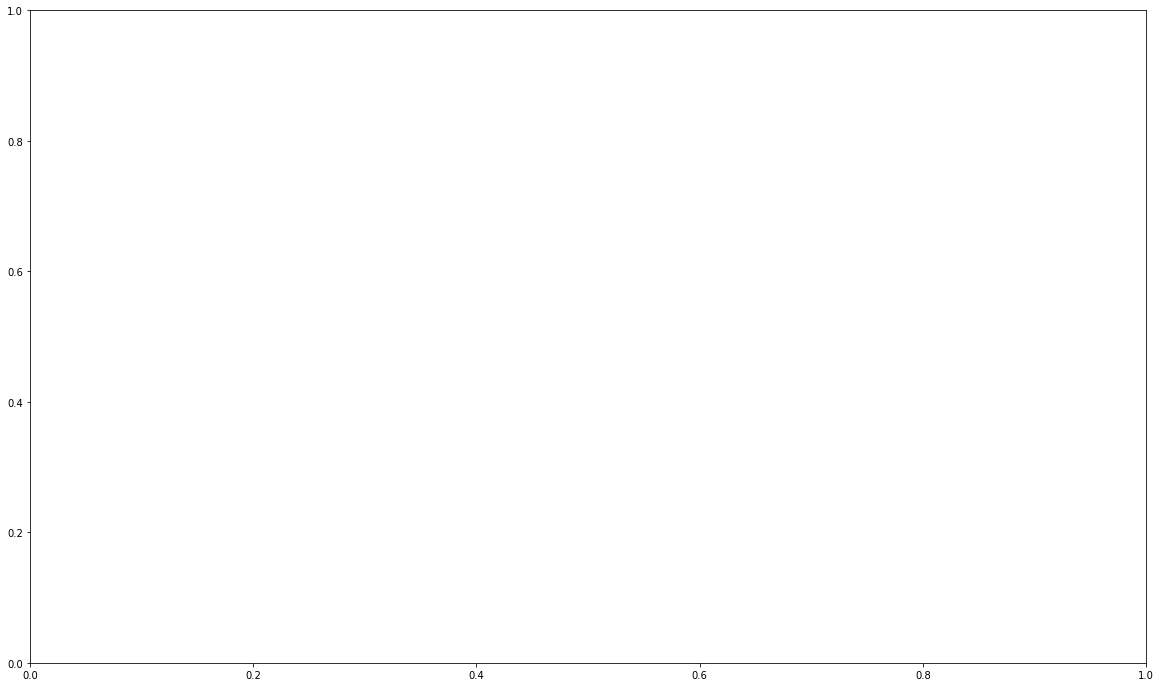

In [94]:
# plot heatmap for population
# dataframe = merged
variable_pop = 'POP_ESTIMATE_2018'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig_pop, ax_pop = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable_pop, cmap='Blues', linewidth=0.8, ax=ax_pop, edgecolor='0.8')
#plt.legend

In [15]:
county_to_zip = pd.read_csv('ZIP_COUNTY_122018.csv')

In [16]:
county_to_zip.head()

,zip,county
0,616,72013
1,617,72054
2,624,72111
3,652,72013
4,660,72067


In [17]:
nw_zipcode = pd.read_csv('./capstone_scrapdata/northwester_nmutual_zipcode.csv')

In [18]:
nw_zipcode_clean = pd.DataFrame(nw_zipcode.iloc[:,1])

In [19]:
nw_zipcode_clean.head()

,northwester_nmutual
0,11516.0
1,10022.0
2,23233.0
3,33487.0
4,91436.0


In [20]:
merge_nw_county = nw_zipcode_clean.merge(county_to_zip, 
                                   left_on = 'northwester_nmutual',
                                   right_on = 'zip', how = 'left' )

In [22]:
count = pd.DataFrame(merge_nw_county.county.value_counts())

In [23]:
count = count.reset_index()
count = count.rename(columns={"index": "CountyId", "county": "counts"})

In [25]:
count

,CountyId,counts
0,36061.0,242
1,17031.0,220
2,6037.0,166
3,13121.0,144
4,48113.0,135
...,...,...
772,18167.0,1
773,26033.0,1
774,19179.0,1
775,18009.0,1


In [26]:
merge_nw_county_with_counts = merge_nw_county.merge(count, how = 'left', left_on = 'county',
                                                   right_on = 'CountyId')

In [27]:
merge_nw_county_with_counts

,northwester_nmutual,zip,county,CountyId,counts
0,11516.0,11516.0,36059.0,36059.0,42.0
1,10022.0,10022.0,36061.0,36061.0,242.0
2,23233.0,23233.0,51087.0,51087.0,53.0
3,23233.0,23233.0,51075.0,51075.0,52.0
4,33487.0,33487.0,12099.0,12099.0,132.0
...,...,...,...,...,...
9212,14534.0,14534.0,36055.0,36055.0,29.0
9213,63105.0,63105.0,29189.0,29189.0,116.0
9214,63105.0,63105.0,29510.0,29510.0,18.0
9215,6107.0,6107.0,9003.0,9003.0,68.0


In [239]:
merge_nw_county_with_counts.to_csv('nw_mutual_agent_counts_by_countyid_and_zip.csv')

In [28]:
#STATEFP COUNTYFP
census_shape['FIPS'] = census_shape[['STATEFP','COUNTYFP']].apply(lambda x: '{}{}'.format(x[0],x[1]),axis = 1)
census_shape['FIPS'] = census_shape['FIPS'].astype(float)

In [29]:
# merged_all_state: include alaska and purto rico
merged_all_state = census_shape.merge(pop_2018, how = 'left', on = 'FIPS')


In [31]:
len(merged_all_state)

3233

In [62]:
#dataframe 'merged' = have population col for each FIPS/county level


population_and_agent_counts_df = merged_all_state.merge(count, how = 'left', left_on = 'FIPS'
                                             ,right_on = 'CountyId')

In [63]:
population_and_agent_counts_df.count()

STATEFP              3233
COUNTYFP             3233
COUNTYNS             3233
GEOID                3233
NAME                 3233
NAMELSAD             3233
LSAD                 3233
CLASSFP              3233
MTFCC                3233
CSAFP                1231
CBSAFP               1899
METDIVFP              113
FUNCSTAT             3233
ALAND                3233
AWATER               3233
INTPTLAT             3233
INTPTLON             3233
geometry             3233
FIPS                 3233
State                3220
Area_Name            3220
POP_ESTIMATE_2018    3220
CountyId              777
counts                777
dtype: int64

In [64]:
population_and_agent_counts_df['CountyId'] = population_and_agent_counts_df['CountyId'].fillna(0)
population_and_agent_counts_df['counts'] = population_and_agent_counts_df['counts'].fillna(0)


In [43]:
#population_and_agent_counts_df = pd.DataFrame(population_and_agent_counts_df)

In [65]:
population_and_agent_counts_df

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,AWATER,INTPTLAT,INTPTLON,geometry,FIPS,State,Area_Name,POP_ESTIMATE_2018,CountyId,counts
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,10690952,41.915865,-96.788517,"POLYGON ((-97.01952 42.00410, -97.01952 42.004...",31039.0,NE,Cuming County,"8,940",0.0,0.0
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,61588406,46.294638,-123.424458,"POLYGON ((-123.43639 46.23820, -123.44759 46.2...",53069.0,WA,Wahkiakum County,"4,426",0.0,0.0
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,...,29089486,34.359273,-104.368696,"POLYGON ((-104.56739 33.99757, -104.56772 33.9...",35011.0,NM,De Baca County,"1,781",0.0,0.0
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,22832516,40.783547,-96.688658,"POLYGON ((-96.91075 40.78494, -96.91075 40.790...",31109.0,NE,Lancaster County,"317,272",31109.0,17.0
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,1718484,40.176492,-98.046842,"POLYGON ((-98.27367 40.08940, -98.27367 40.089...",31129.0,NE,Nuckolls County,"4,195",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,...,12283371,34.690506,-84.454624,"POLYGON ((-84.65478 34.66559, -84.65488 34.669...",13123.0,GA,Gilmer County,"30,816",13123.0,2.0
3229,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,...,16913419,48.761068,-95.821504,"POLYGON ((-96.40466 48.80528, -96.40467 48.813...",27135.0,MN,Roseau County,"15,150",0.0,0.0
3230,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,...,71295137,32.634370,-90.034160,"POLYGON ((-90.09363 32.70763, -90.09360 32.707...",28089.0,MS,Madison County,"105,630",28089.0,13.0
3231,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,...,8841783,32.303471,-101.438772,"POLYGON ((-101.69227 32.27106, -101.69221 32.2...",48227.0,TX,Howard County,"36,459",0.0,0.0


In [45]:
#population_and_agent_counts_df.to_csv('merge_nw_agents_to_shape_file.csv')

ValueError: setting an array element with a sequence

In [68]:

population_and_agent_counts_df['POP_ESTIMATE_2018']

0         8940
1         4426
2         1781
3       317272
4         4195
         ...  
3228     30816
3229     15150
3230    105630
3231     36459
3232     39944
Name: POP_ESTIMATE_2018, Length: 3233, dtype: object

In [67]:
population_and_agent_counts_df['POP_ESTIMATE_2018'] = population_and_agent_counts_df['POP_ESTIMATE_2018'].str.replace(',', '')

In [70]:
population_and_agent_counts_df['counts'] = population_and_agent_counts_df['counts'].astype(float)
population_and_agent_counts_df['POP_ESTIMATE_2018'] = population_and_agent_counts_df['POP_ESTIMATE_2018'].astype(float)

In [71]:
population_and_agent_counts_df['agent_per_capita'] = population_and_agent_counts_df['counts']/population_and_agent_counts_df['POP_ESTIMATE_2018']

In [72]:
#population_and_agent_counts_df = gpd(population_and_agent_counts_df)

TypeError: 'module' object is not callable

In [74]:
# constrain : no Alska Hawaii etc
df_mainland = population_and_agent_counts_df[(population_and_agent_counts_df['INTPTLAT'] > 25)
                                             &(population_and_agent_counts_df['INTPTLAT'] < 60)
                                             &(population_and_agent_counts_df['INTPTLON'] > -130)
                                             &(population_and_agent_counts_df['INTPTLON'] < -50)]

In [89]:
df_mainland['agent_per_capita_scale_1000'] = df_mainland['agent_per_capita']*1000

/Users/ruoyuzhu/anaconda3/envs/1011nlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
df_mainland[df_mainland['agent_per_capita_scale_1000']>1]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,INTPTLON,geometry,FIPS,State,Area_Name,POP_ESTIMATE_2018,CountyId,counts,agent_per_capita,agent_per_capita_scale_1000
750,51,075,01674271,51075,Goochland,Goochland County,06,H1,G4020,None,...,-77.917626,"POLYGON ((-78.08755 37.66988, -78.08766 37.669...",51075.0,VA,Goochland County,23244.0,51075.0,52.0,0.002237,2.237136
812,31,143,00835893,31143,Polk,Polk County,06,H1,G4020,None,...,-97.570663,"POLYGON ((-97.82516 41.17698, -97.82482 41.177...",31143.0,NE,Polk County,5278.0,31143.0,7.0,0.001326,1.326260
1414,51,036,01480109,51036,Charles City,Charles City County,06,H1,G4020,None,...,-77.054170,"POLYGON ((-77.13587 37.30369, -77.15516 37.306...",51036.0,VA,Charles City County,6941.0,51036.0,11.0,0.001585,1.584786
1875,16,015,00395157,16015,Boise,Boise County,06,H1,G4020,147,...,-115.715110,"POLYGON ((-116.11249 44.14784, -116.11170 44.1...",16015.0,ID,Boise County,7634.0,16015.0,25.0,0.003275,3.274823
2279,30,067,01720027,30067,Park,Park County,06,H1,G4020,None,...,-110.532760,"POLYGON ((-111.03823 45.26587, -111.03824 45.2...",30067.0,MT,Park County,16736.0,30067.0,17.0,0.001016,1.015774
3012,31,063,00835853,31063,Frontier,Frontier County,06,H1,G4020,None,...,-100.406683,"POLYGON ((-100.78193 40.61298, -100.78193 40.6...",31063.0,NE,Frontier County,2608.0,31063.0,3.0,0.001150,1.150307


In [104]:
df_mainland[(df_mainland['STATEFP'] == '55') & (df_mainland['agent_per_capita'] > 0.0001)]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,INTPTLON,geometry,FIPS,State,Area_Name,POP_ESTIMATE_2018,CountyId,counts,agent_per_capita,agent_per_capita_scale_1000
155,55,063,01581091,55063,La Crosse,La Crosse County,06,H1,G4020,None,...,-91.111758,"POLYGON ((-91.34774 43.91196, -91.34874 43.912...",55063.0,WI,La Crosse County,118230.0,55063.0,15.0,0.000127,0.126871
439,55,047,01581083,55047,Green Lake,Green Lake County,06,H1,G4020,None,...,-89.113699,"POLYGON ((-89.16812 43.87647, -89.16810 43.877...",55047.0,WI,Green Lake County,18918.0,55047.0,2.0,0.000106,0.105719
689,55,079,01581100,55079,Milwaukee,Milwaukee County,06,H1,G4020,376,...,-87.481554,"POLYGON ((-87.99417 43.19255, -87.99331 43.192...",55079.0,WI,Milwaukee County,948201.0,55079.0,107.0,0.000113,0.112845
973,55,089,01581105,55089,Ozaukee,Ozaukee County,06,H1,G4020,376,...,-87.499304,"POLYGON ((-88.04070 43.45448, -88.04070 43.454...",55089.0,WI,Ozaukee County,89147.0,55089.0,50.0,0.000561,0.560871
1003,55,131,01581125,55131,Washington,Washington County,06,H1,G4020,376,...,-88.232917,"POLYGON ((-88.04070 43.45448, -88.04071 43.454...",55131.0,WI,Washington County,135693.0,55131.0,19.0,0.000140,0.140022
1023,55,097,01581109,55097,Portage,Portage County,06,H1,G4020,554,...,-89.498070,"POLYGON ((-89.84512 44.59840, -89.84512 44.598...",55097.0,WI,Portage County,70942.0,55097.0,8.0,0.000113,0.112768
1159,55,105,01581113,55105,Rock,Rock County,06,H1,G4020,357,...,-89.075284,"POLYGON ((-89.36744 42.67230, -89.36745 42.672...",55105.0,WI,Rock County,163129.0,55105.0,17.0,0.000104,0.104212
1308,55,035,01581077,55035,Eau Claire,Eau Claire County,06,H1,G4020,232,...,-91.286414,"POLYGON ((-91.64962 44.78046, -91.64963 44.781...",55035.0,WI,Eau Claire County,104534.0,55035.0,16.0,0.000153,0.153060
1545,55,087,01581104,55087,Outagamie,Outagamie County,06,H1,G4020,118,...,-88.464988,"POLYGON ((-88.73683 44.37356, -88.73682 44.373...",55087.0,WI,Outagamie County,187365.0,55087.0,48.0,0.000256,0.256184
1954,55,025,01581072,55025,Dane,Dane County,06,H1,G4020,357,...,-89.417852,"POLYGON ((-89.83796 43.11858, -89.83796 43.122...",55025.0,WI,Dane County,542364.0,55025.0,59.0,0.000109,0.108783


/Users/ruoyuzhu/anaconda3/envs/1011nlp/lib/python3.6/site-packages/mapclassify/classifiers.py:138: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/ruoyuzhu/anaconda3/envs/1011nlp/lib/python3.6/site-packages/mapclassify/classifiers.py:140: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1, 'agent per capita at county level (scale to 1000)')

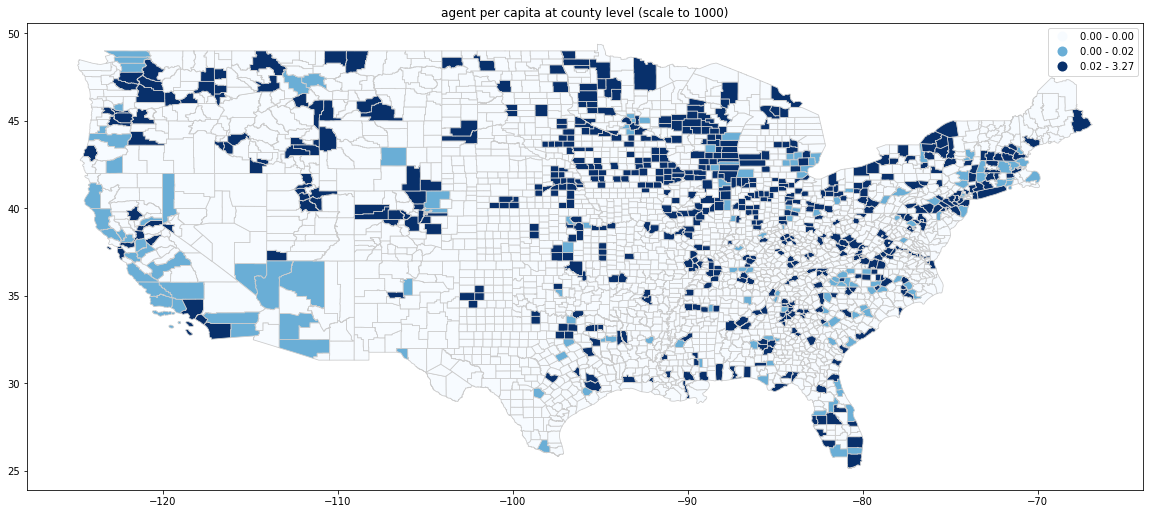

In [137]:
#plot heatmap for agents per capita for NW mutual
variable = 'agent_per_capita_scale_1000'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
# df_mainland.plot(column = variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = 'lower right', 
#                  scheme = 'User_Defined',
#                 classification_kwds = dict(bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 3])
#                 )
df_mainland.plot(column = variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend = 'lower right', 
                 scheme = 'quantiles')
ax.set_title('agent per capita at county level (scale to 1000)')

Text(0.5, 1, 'population heat map at county level')

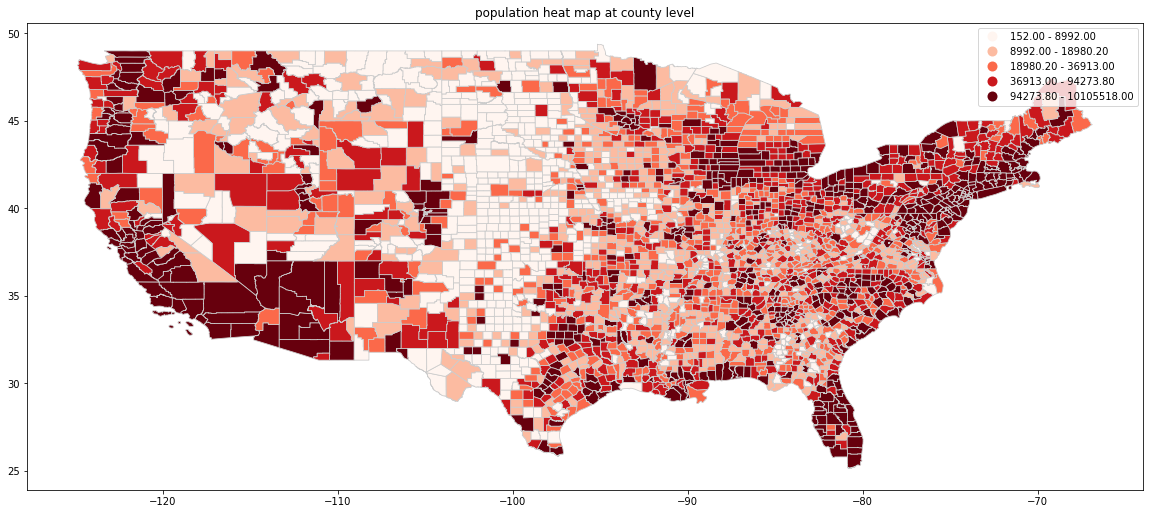

In [136]:
#plot heatmap for agents per capita for NW mutual
#variable_pop = 'POP_ESTIMATE_2018'
variable = 'POP_ESTIMATE_2018'
# set the range for the choropleth
#vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
df_mainland.plot(column = variable_pop, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True, scheme = 'quantiles')
ax.set_title('population heat map at county level')
#,
                 #legend = 'lower right', 
                 #scheme = 'User_Defined',
                #classification_kwds = dict(bins = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 1.5, 3])
             #  )

In [134]:
df_mainland['POP_ESTIMATE_2018']

0         8940.0
1         4426.0
2         1781.0
3       317272.0
4         4195.0
          ...   
3228     30816.0
3229     15150.0
3230    105630.0
3231     36459.0
3232     39944.0
Name: POP_ESTIMATE_2018, Length: 3107, dtype: float64

In [118]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

In [121]:
df_mainland.to_file(driver = 'ESRI Shapefile', filename = 'agent_per_capita_mainland')
#gdf.to_file(driver = 'ESRI Shapefile', filename = input_path)

In [122]:
population_and_agent_counts_df.to_file(driver = 'ESRI Shapefile', filename = 'agent_per_capita_all')